### Loading Data

In [ ]:
import pandas as pd

In [ ]:
df_ntl_viirs = pd.read_excel('./data/complile_ntl_viirs_all_country.xlsx',sheet_name='yearly')

In [ ]:
country_code_data = pd.read_excel('./data/complile_ntl_viirs_all_country.xlsx',sheet_name='country_code')

In [ ]:
country_code_data.head()

,FIPS 10-4,ISO 3166,Name,ISO3,continent,region
0,AF,AF,Afghanistan,AFG,Asia,Southern Asia
1,AX,-,Akrotiri,NaN,NaN,NaN
2,AL,AL,Albania,ALB,Europe,Southern Europe
3,AG,DZ,Algeria,DZA,Africa,Northern Africa
4,AQ,AS,American Samoa,ASM,Oceania,Polynesia


In [ ]:
def get_iso3(row):
  country_2 = row['country_code_2']
  country_2 = country_2.upper()
  iso_3 = country_code_data.loc[country_code_data['FIPS 10-4']==country_2, 'ISO3'].to_list()[0]
  return iso_3

In [ ]:
df_ntl_viirs.head()

,country_code_2,country_code_3,year,avg_sol
0,sc,SYC,2012,1.919000
1,sc,SYC,2013,2.046000
2,sc,SYC,2014,2.186333
3,sc,SYC,2015,2.266250
4,sc,SYC,2016,2.178750


In [ ]:
df_ntl_viirs['country_code_3'] = df_ntl_viirs.apply(get_iso3,axis=1)

In [ ]:
df_ntl_viirs.head()

,country_code_2,country_code_3,year,avg_sol
0,sc,KNA,2012,1.919000
1,sc,KNA,2013,2.046000
2,sc,KNA,2014,2.186333
3,sc,KNA,2015,2.266250
4,sc,KNA,2016,2.178750


### Merging NTL and Poverty Data

In [ ]:
df_kemiskinan = pd.read_excel("./data/data kemiskinan.xlsx")

In [ ]:
df_kemiskinan_imputed = pd.read_csv('./data/pov365_spline.csv')

In [ ]:
df_kemiskinan.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52.9,NaN,NaN,NaN


In [ ]:
df_kemiskinan_imputed.head()

,Year,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
0,1960,NaN,NaN,NaN,NaN,39.500000,8.900000,NaN,NaN,0,...,NaN,76.100000,42.000000,57.700000,13.700000,21.800000,29.600000,52.100000,72.500000,47.900000
1,1961,NaN,NaN,NaN,NaN,39.213195,9.867361,NaN,NaN,0,...,NaN,72.481271,41.885246,57.791027,13.578957,21.825050,30.022938,51.881427,74.953530,48.279629
2,1962,NaN,NaN,NaN,NaN,38.943273,10.696594,NaN,NaN,0,...,NaN,69.483695,41.770492,57.976218,13.460201,21.868219,30.445330,51.730335,76.626581,48.655675
3,1963,NaN,NaN,NaN,NaN,38.690234,11.394053,NaN,NaN,0,...,NaN,67.061498,41.655738,58.100295,13.343730,21.926488,30.867176,51.642128,77.606159,49.028138
4,1964,NaN,NaN,NaN,NaN,38.454077,11.966090,NaN,NaN,0,...,NaN,65.168904,41.540984,57.997242,13.229546,21.996832,31.288476,51.612211,77.979269,49.397017


In [ ]:
df_kemiskinan_imputed.set_index('Year', inplace=True)

In [ ]:
df_kemiskinan_imputed_t = df_kemiskinan_imputed.T

In [ ]:
df_kemiskinan_imputed_t 

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,39.5,39.213195,38.943273,38.690234,38.454077,38.234802,38.032411,37.846901,37.678275,37.526531,...,46.972432,47.563521,48.171492,48.796345,49.438081,50.096700,52.900000,51.464585,52.173851,52.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,21.8,21.825050,21.868219,21.926488,21.996832,22.076229,22.161659,22.250097,22.338522,22.423805,...,7.000000,4.700000,6.200000,3.800000,4.700000,4.200000,5.014923,5.019127,4.766426,4.2
YEM,29.6,30.022938,30.445330,30.867176,31.288476,31.709230,32.129438,32.549100,32.968216,33.386785,...,50.868753,51.263298,54.400000,52.050749,52.443656,52.836017,53.227832,53.619101,54.009823,54.4
ZAF,52.1,51.881427,51.730335,51.642128,51.612211,51.635990,51.708870,51.826255,51.983551,52.176162,...,38.540335,38.794809,40.000000,39.311518,39.548093,39.753043,39.913539,40.016750,40.049847,40.0
ZMB,72.5,74.953530,76.626581,77.606159,77.979269,77.832917,77.255984,76.347000,75.207588,73.939369,...,81.980645,81.644592,81.269747,77.500000,80.400842,79.905361,79.368247,78.788789,78.166277,77.5


In [ ]:
df_kemiskinan_imputed_t = df_kemiskinan_imputed_t.rename_axis('Country Code').reset_index()

In [ ]:
df_kemiskinan_imputed_t

Year,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,39.5,39.213195,38.943273,38.690234,38.454077,38.234802,38.032411,37.846901,37.678275,...,46.972432,47.563521,48.171492,48.796345,49.438081,50.096700,52.900000,51.464585,52.173851,52.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,21.8,21.825050,21.868219,21.926488,21.996832,22.076229,22.161659,22.250097,22.338522,...,7.000000,4.700000,6.200000,3.800000,4.700000,4.200000,5.014923,5.019127,4.766426,4.2
262,YEM,29.6,30.022938,30.445330,30.867176,31.288476,31.709230,32.129438,32.549100,32.968216,...,50.868753,51.263298,54.400000,52.050749,52.443656,52.836017,53.227832,53.619101,54.009823,54.4
263,ZAF,52.1,51.881427,51.730335,51.642128,51.612211,51.635990,51.708870,51.826255,51.983551,...,38.540335,38.794809,40.000000,39.311518,39.548093,39.753043,39.913539,40.016750,40.049847,40.0
264,ZMB,72.5,74.953530,76.626581,77.606159,77.979269,77.832917,77.255984,76.347000,75.207588,...,81.980645,81.644592,81.269747,77.500000,80.400842,79.905361,79.368247,78.788789,78.166277,77.5


In [ ]:
df_ntl_viirs.head()

,country_code_2,country_code_3,year,avg_sol
0,sc,KNA,2012,1.919000
1,sc,KNA,2013,2.046000
2,sc,KNA,2014,2.186333
3,sc,KNA,2015,2.266250
4,sc,KNA,2016,2.178750


In [ ]:
import numpy as np

In [ ]:
df_kemiskinan_imputed_t.columns

Index(['Country Code',           1960,           1961,           1962,
                 1963,           1964,           1965,           1966,
                 1967,           1968,           1969,           1970,
                 1971,           1972,           1973,           1974,
                 1975,           1976,           1977,           1978,
                 1979,           1980,           1981,           1982,
                 1983,           1984,           1985,           1986,
                 1987,           1988,           1989,           1990,
                 1991,           1992,           1993,           1994,
                 1995,           1996,           1997,           1998,
                 1999,           2000,           2001,           2002,
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
      

In [ ]:
def merging_data(row):
  country_code = row['country_code_3']
  year = row['year']
  if year in df_kemiskinan_imputed_t.columns and country_code in df_kemiskinan_imputed_t['Country Code'].unique():
    pov = df_kemiskinan_imputed_t.loc[df_kemiskinan_imputed_t['Country Code']==country_code,year].tolist()[0]
  else:
    pov = np.nan
  return pov

In [ ]:
df_ntl_viirs['poverty']=df_ntl_viirs.apply(merging_data,axis=1)

In [ ]:
df_ntl_viirs.shape

(2629, 5)

In [ ]:
df_ntl_poverty = df_ntl_viirs[df_ntl_viirs['poverty'].notna()]

In [ ]:
df_ntl_poverty.shape

(1504, 5)

In [ ]:
df_ntl_poverty = df_ntl_poverty.rename({'poverty': 'Poverty', 'avg_sol':'NTL'}, axis=1)

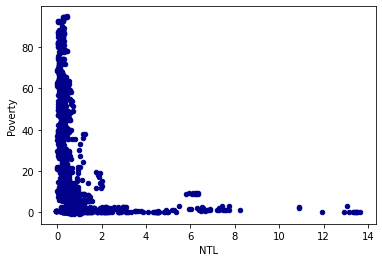

In [ ]:
df_ntl_poverty.plot.scatter(x='NTL',y='Poverty',c='DarkBlue')

In [ ]:
df_ntl_poverty.to_excel("./data/NTL and Poverty.xlsx",index=False)

## Modelling and Prediction

In [ ]:
df_ntl_poverty.head()

,country_code_2,country_code_3,year,NTL,Poverty
11,jm,JAM,2012,1.090222,8.993179
12,jm,JAM,2013,1.222500,8.929733
13,jm,JAM,2014,1.174417,8.842914
14,jm,JAM,2015,1.209833,8.729381
15,jm,JAM,2016,1.184333,8.584029


In [ ]:
df_ntl_poverty.sort_values(by = ['country_code_3', 'year'], axis=0, ascending=[True, True], inplace=True,ignore_index=True, key=None)

In [ ]:
df_ntl_poverty.head(100)

,country_code_2,country_code_3,year,NTL,Poverty
0,ao,AGO,2012,0.039222,46.972432
1,ao,AGO,2013,0.094917,47.563521
2,ao,AGO,2014,0.069750,48.171492
3,ao,AGO,2015,0.075000,48.796345
4,ao,AGO,2016,0.056833,49.438081
...,...,...,...,...,...
95,be,BEL,2017,3.110333,0.200000
96,be,BEL,2018,2.888417,0.100000
97,be,BEL,2019,3.113083,0.100000
98,be,BEL,2020,2.770500,0.062963


In [ ]:
list_countries = df_ntl_poverty['country_code_2'].unique()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
country_score = {'country code':[], 'r2 score':[], 'mse':[], 'model name':[]}

In [ ]:
import pickle

In [ ]:
df_predict = pd.read_excel('./data/complile_ntl_viirs_all_country.xlsx',sheet_name='quarterly')

In [ ]:
df_predict.rename(columns={'avg_sol': 'NTL'}, inplace=True)

In [ ]:
!mkdir models

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
for country in list_countries:
  data_country =  df_ntl_poverty[df_ntl_poverty['country_code_2']==country]
  if data_country.shape[0] <10:
    next
  else:
    X = pd.DataFrame(data_country["NTL"])
    #X.insert(0, 'Series', range(0, 0 + X.shape[0]))
    y = data_country["Poverty"]
    model_rf = RandomForestRegressor(random_state=0) # inisiasi
    model_rf.fit(X, y) # fitting
    r2_score = model_rf.score(X, y)
    country_score['country code'].append(country)
    country_score['r2 score'].append(r2_score)
    y_pred = model_rf.predict(X)
    mse = mean_squared_error(y, y_pred, squared=False)
    country_score['mse'].append(mse)
    print(country,model_rf.score(X, y))
    if r2_score > 0.5:
      file_name = 'model_pov_ntl_'+country+'.pkl'
      country_score['model name'].append(file_name)
      with open('models/'+file_name, 'wb') as files:
        pickle.dump(model_rf, files)
      data_predict = df_predict[df_predict['country_code_2']==country]
      df_predict.loc[df_predict['country_code_2']==country,'Poverty'] = model_rf.predict(pd.DataFrame(data_predict.loc[:,'NTL']))
    else:
      country_score['model name'].append("not processed")

ao 0.9412777145470518
al 0.8980409756763676
ae 1.0
am 0.8717889642587966
cr 0.7696502829974534
at 0.735904951001682
au 0.726972836416984
aj 0.7533722103011862
by 0.8682553433019122
be 0.8315619904233971
bn 0.9500453050782202
uv 0.9474226455887361
bg 0.8351146023542231
bu 0.9645256793769429
bk 0.9415568765569573
bo 0.7563333333333317
bh 0.9585926876379487
bl 0.9492441094941098
bt 0.6436790486901831
bc 0.7662938588809683
ct 0.9644072727272937
sz 0.8199499125899993
iv 0.9396880022163879
cm 0.84335796279741
cf 0.9454084848484658
co 0.8431155485018971
cn 0.8044443231440587
cv 0.8086067465161955
cs 0.8865720623653185
cy 0.8369799007074281
ez 0.830350566043581
gm 0.9264920427216246
dj 0.7042350788704264
da 0.8522673183463682
dr 0.9823892322042794
ec 0.7834965708485001
eg 0.9793822068334562
sp 0.8748896059457125
en 0.7971622381685793
et 0.8373333307859523
fi -0.0002772185442230235
fj 0.9516158331459643
fr 0.8434267217509628
fm 0.8644922711058187
gb 0.948776015857283
im 0.8073992573242951
uk 0.

In [ ]:
df_country_models = pd.DataFrame(country_score)

In [ ]:
df_country_models.to_excel("./data/country models and score.xlsx",index=False)

In [ ]:
df_predict

,country_code_2,year,quarter,NTL,Poverty
0,sc,2012,2,1.918000,NaN
1,sc,2012,3,1.929000,NaN
2,sc,2012,4,1.910000,NaN
3,sc,2013,1,2.102333,NaN
4,sc,2013,2,2.093333,NaN
...,...,...,...,...,...
9794,cd,2021,2,0.280000,64.482505
9795,cd,2021,3,0.267000,64.482505
9796,cd,2021,4,0.293000,64.482505
9797,cd,2022,1,0.277333,64.482505


In [ ]:
df_predict = df_predict[df_predict['Poverty'].notna()]

In [ ]:
df_predict.shape

(6109, 5)

In [ ]:
df_predict.to_excel("./data/prediction all country quarterly.xlsx",index=False)

In [ ]:
import shutil
shutil.make_archive('models', 'zip', 'models')

'/content/models.zip'